In [ ]:
import os
import pandas as pd
import numpy as np
data = pd.read_csv("/Flight Price Prediction.csv")
data.head(5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
data.shape

(300153, 12)

In [6]:
data.describe(include="all")

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,NaN,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,NaN,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,NaN,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,86646.852011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,75038.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,225114.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
data_Y= data["price"]


In [9]:
data_X= pd.get_dummies(data)

In [10]:
data_X.head()

,Unnamed: 0,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,0,2.17,1,5953,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
1,1,2.33,1,5953,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
2,2,2.17,1,5956,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,3,2.25,1,5955,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,4,2.33,1,5955,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x226f7407050>,
 'caps': [<matplotlib.lines.Line2D at 0x226f74147d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x226f7406490>],
 'medians': [<matplotlib.lines.Line2D at 0x226f7415d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x226f7416810>],
 'means': []}

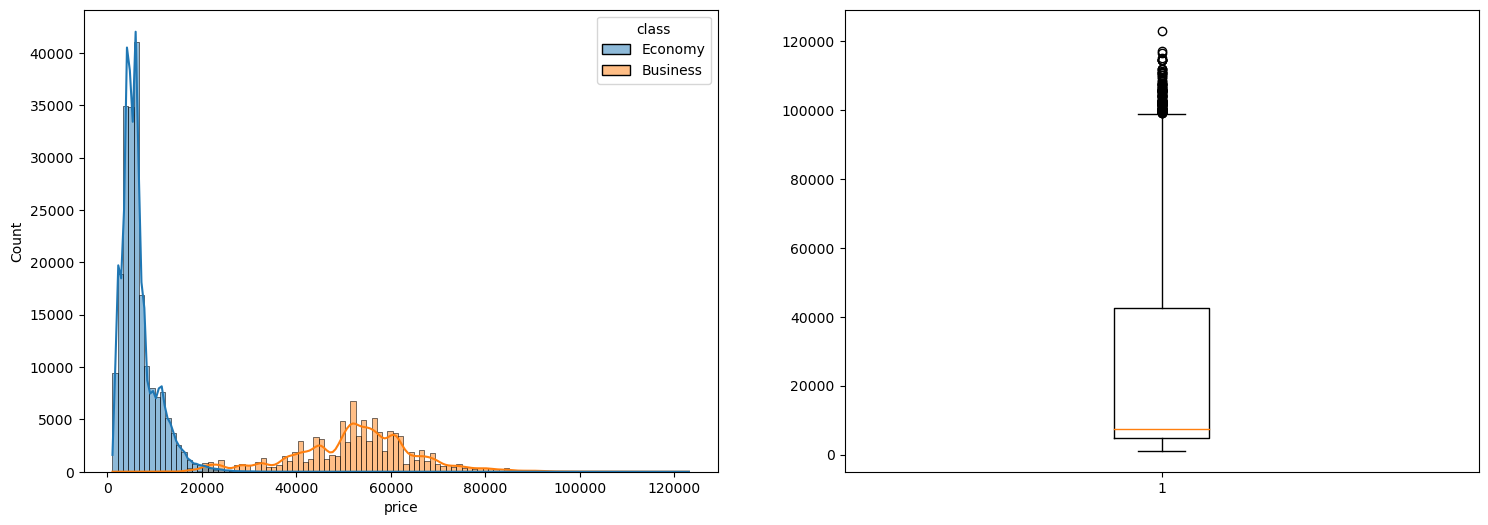

In [16]:
plt.figure(figsize=(18, 6),dpi=100)
plt.subplot(1,2,1)
sns.histplot(x='price',data=data,hue="class",kde=True)
plt.subplot(1,2,2)
plt.boxplot(x='price',data=data)

Text(0.5, 1.0, 'Airline prices based on the class and company')

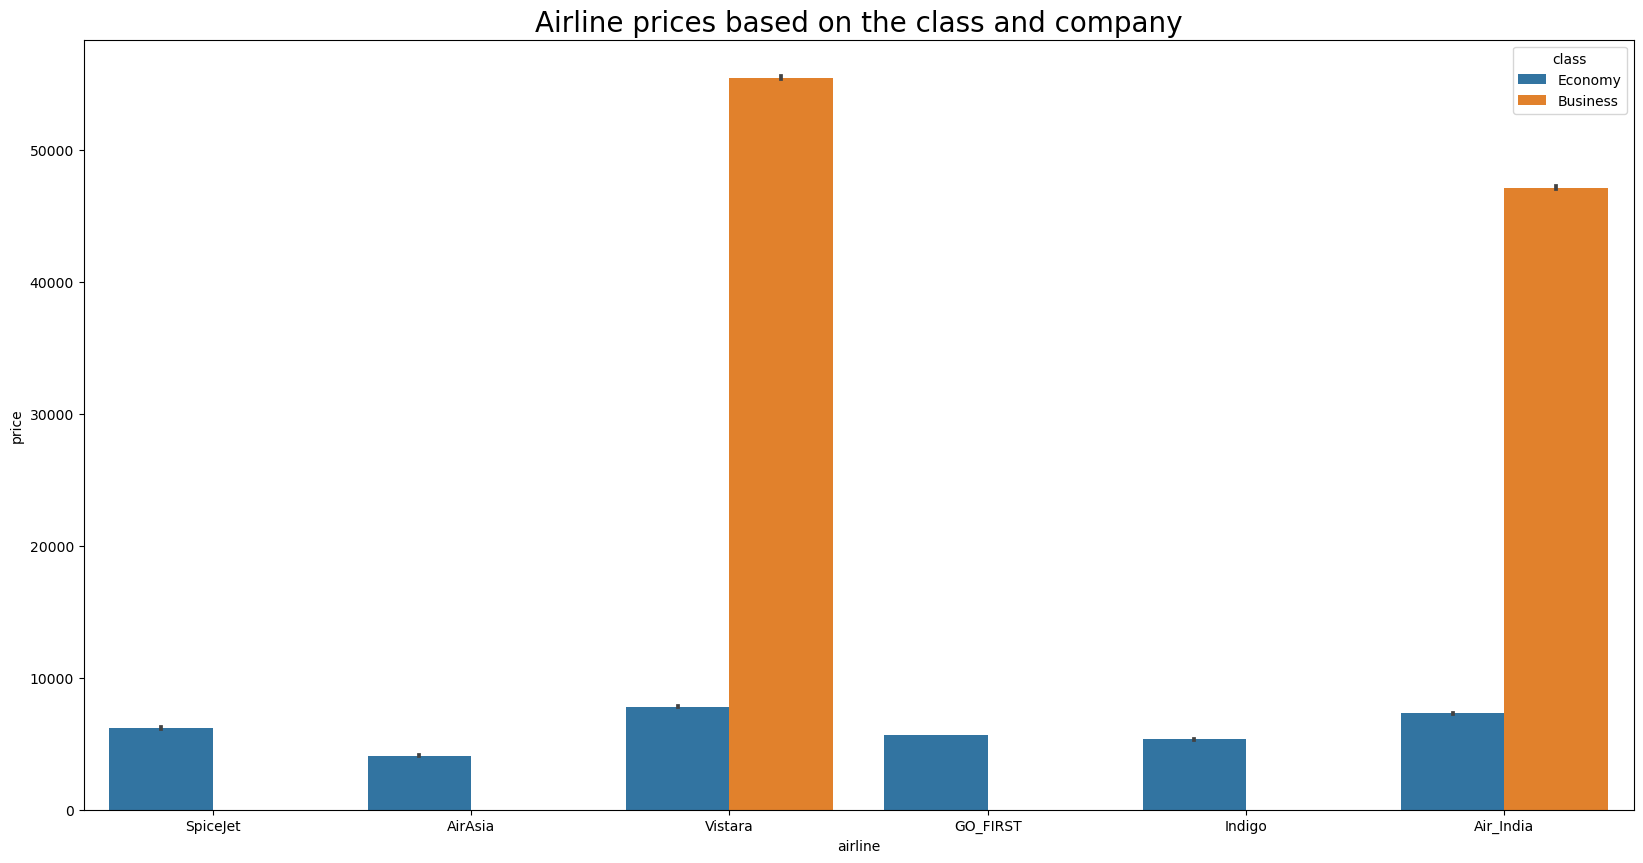

In [15]:
#### HOW DOES THE PRICE VARY WITH CLASS

plt.figure(figsize=(20, 10))
sns.barplot(x='airline',y='price',hue="class",data=data.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

Text(0.5, 1.0, 'Prices based on Airline for Business Class')

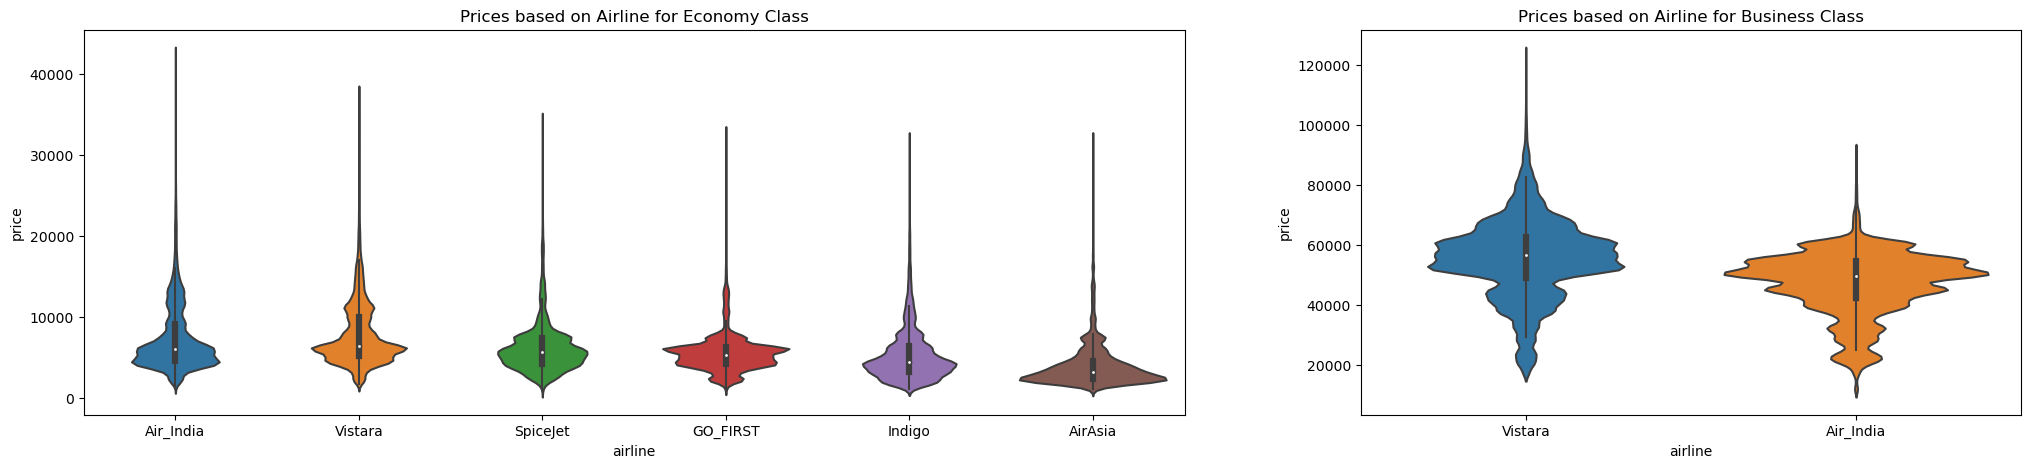

In [23]:
### DOES PRICE VARY WITH AIRLINES ?
fig, ax = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.violinplot(x='airline',y='price',data= data.loc[data["class"]=="Economy"].sort_values(by="price" ,ascending=False),ax=ax[0])
ax[0].set_title("Prices based on Airline for Economy Class")
sns.violinplot(x='airline',y='price',data= data.loc[data["class"]=="Business"].sort_values(by="price",ascending=False),ax=ax[1])
ax[1].set_title("Prices based on Airline for Business Class")

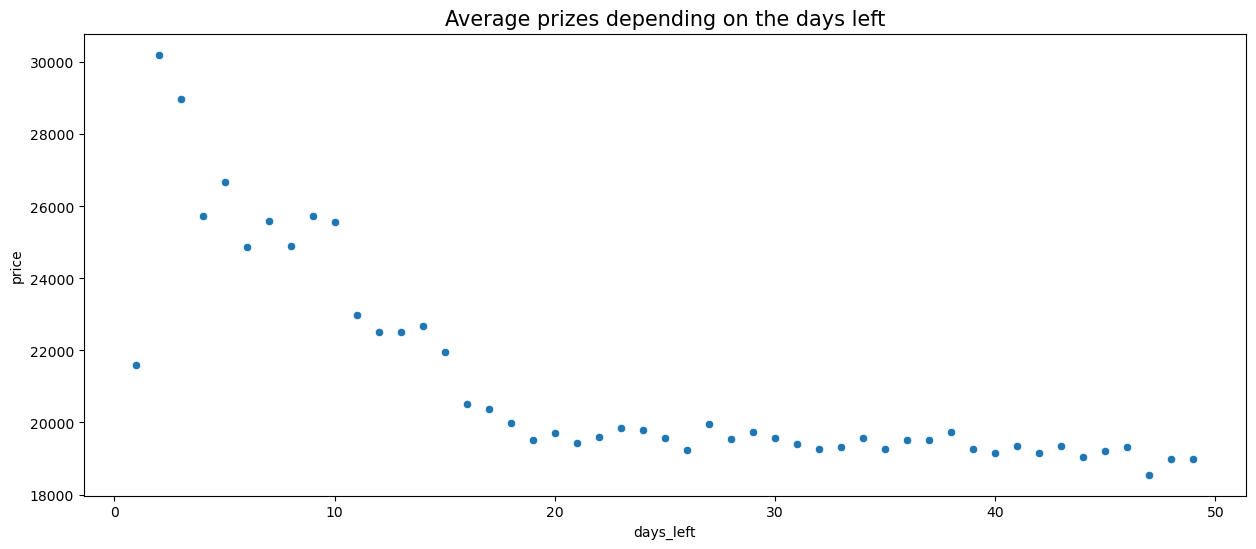

In [26]:
df_temp = data.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days_left", y="price", data=df_temp).set_title("Average prizes depending on the days left",fontsize=15)

<Axes: xlabel='days_left', ylabel='price'>

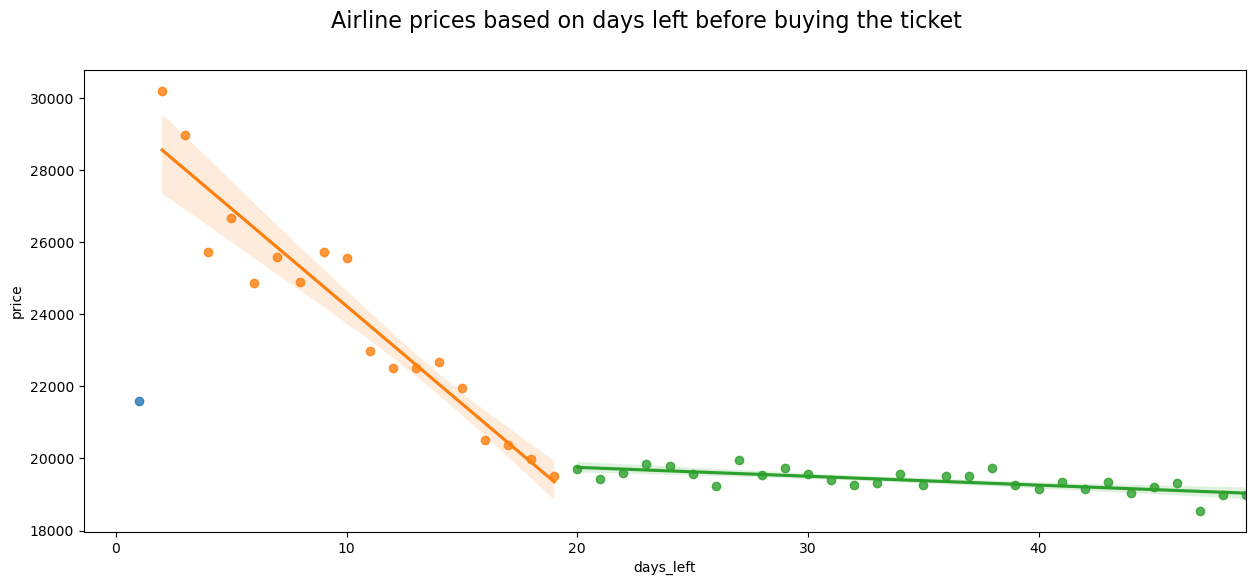

In [30]:
### How is the price affected when tickets are bought in just 1 or 2 days before departure?

plt.figure(figsize=(15,6)).suptitle('Airline prices based on days left before buying the ticket', fontsize=16)
ax = plt.axes()
sns.regplot(x=df_temp.loc[df_temp["days_left"]==1].days_left, y=df_temp.loc[df_temp["days_left"]==1].price, fit_reg=False, ax=ax)
sns.regplot(x=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].days_left, y=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].price, fit_reg=True, ax=ax)
sns.regplot(x=df_temp.loc[df_temp["days_left"]>=20].days_left, y=df_temp.loc[df_temp["days_left"]>=20].price, fit_reg=True, ax=ax)

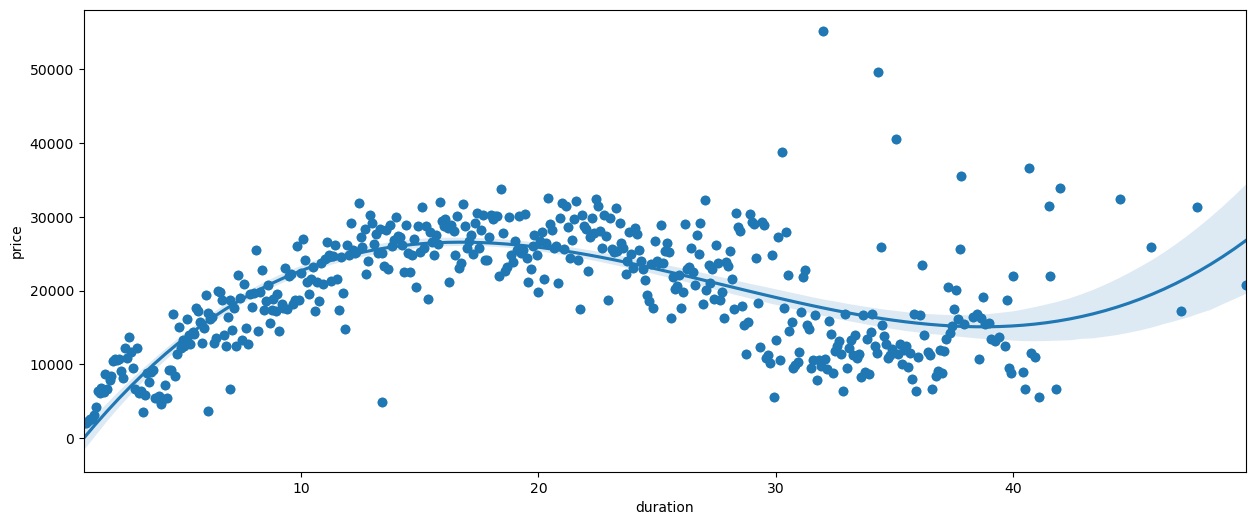

In [36]:
df_duration= data.groupby(["duration"])["price"].mean().reset_index()

plt.figure(figsize=(15,6))
ax=plt.scatter(x='duration',y="price",data=df_duration)
ax = sns.regplot(x="duration", y="price", data=df_duration,order=2)

###### It is clear that here the relationship is not linear but can be approximated with a second degree curve. The prices reaches a high price at a duration of 20 hours before lowering again.

However some outliers seem to affect the regression curve .

Text(0.5, 1.0, 'Airline prices based on the arrival time')

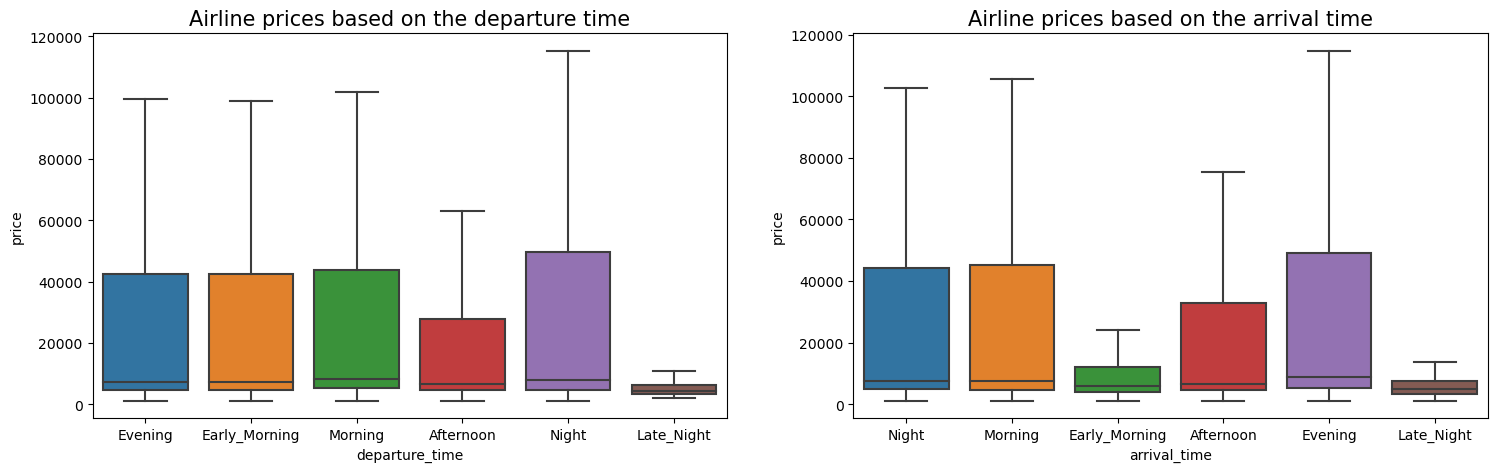

In [40]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.boxplot(data=data, y="price", x="departure_time",showfliers=False).set_title("Airline prices based on the departure time",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=data, y="price", x="arrival_time",showfliers=False).set_title("Airline prices based on the arrival time",fontsize=15)

###### As expected, leaving at night or arriving at night remains the cheapest way to travel. But it's also visible that arriving early morning is also cheap and afternoon flight are a bit cheaper that evening, morning and night flight.

Text(0.5, 0.98, 'Airline prices based on the source and destination cities')

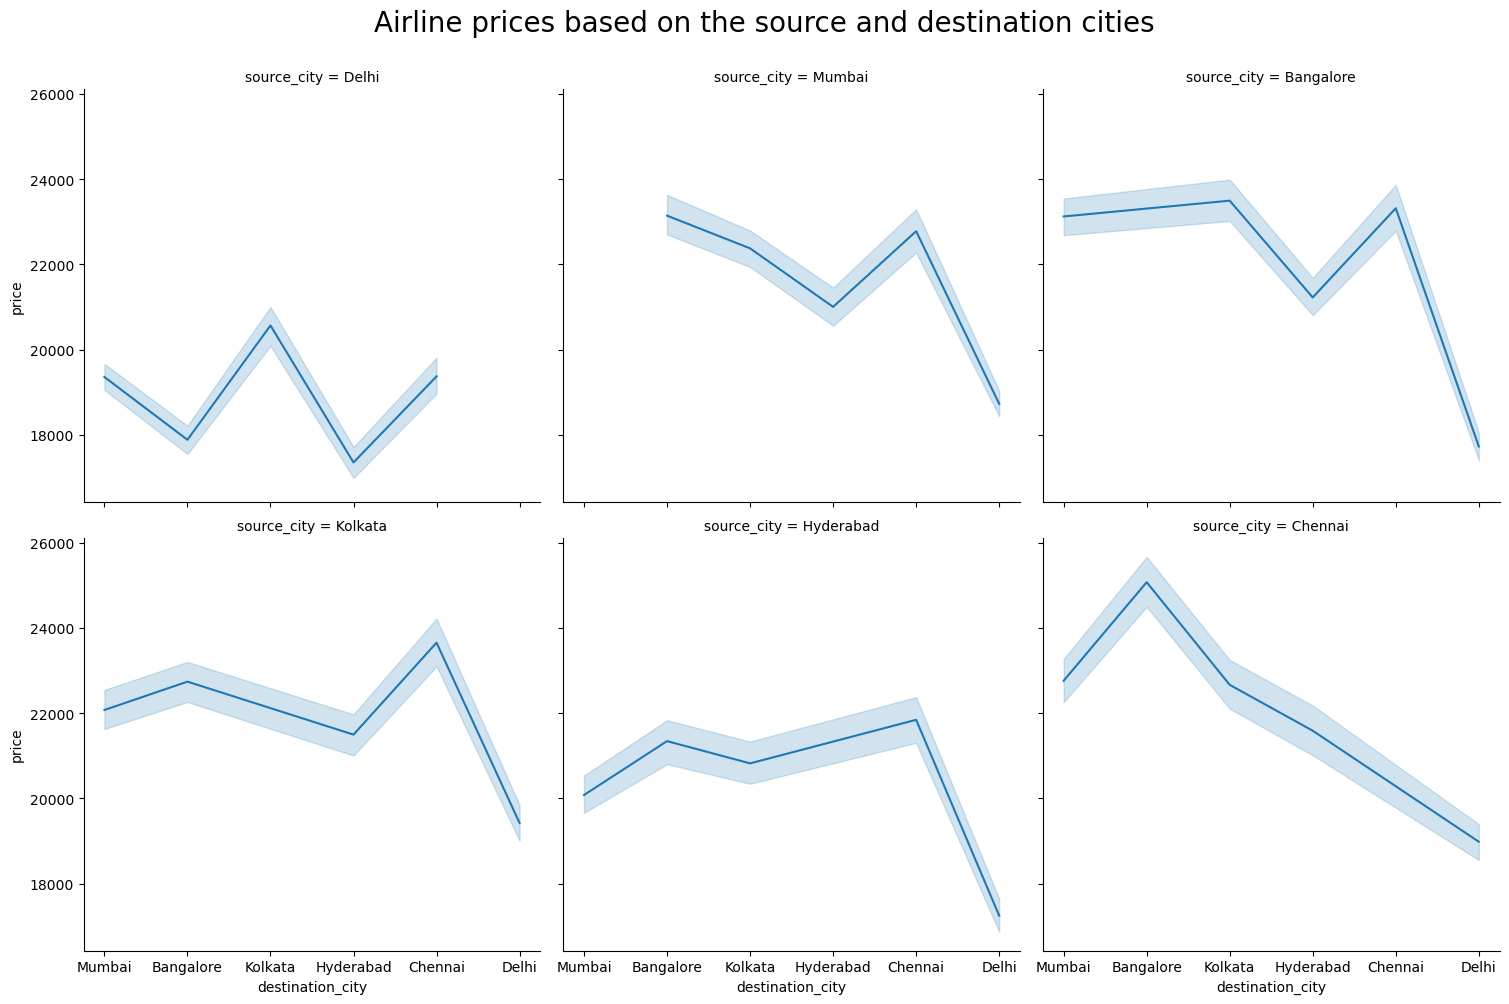

In [42]:
ax = sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=data, col_wrap=3)
ax.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
ax.fig.suptitle('Airline prices based on the source and destination cities',fontsize=20)

###### On one hand, it seems that flight leaving from Delhi are often cheaper that from other source cities and the capital is also the cheapest deatination to go probably because as a capital cities, the airport is the biggest and proposes more flights. In an other hand, the prices are more or less similar and Hyderabad being the most expensive destination.

Text(0.5, 1.0, 'Airline prices based on the number of stops  for business')

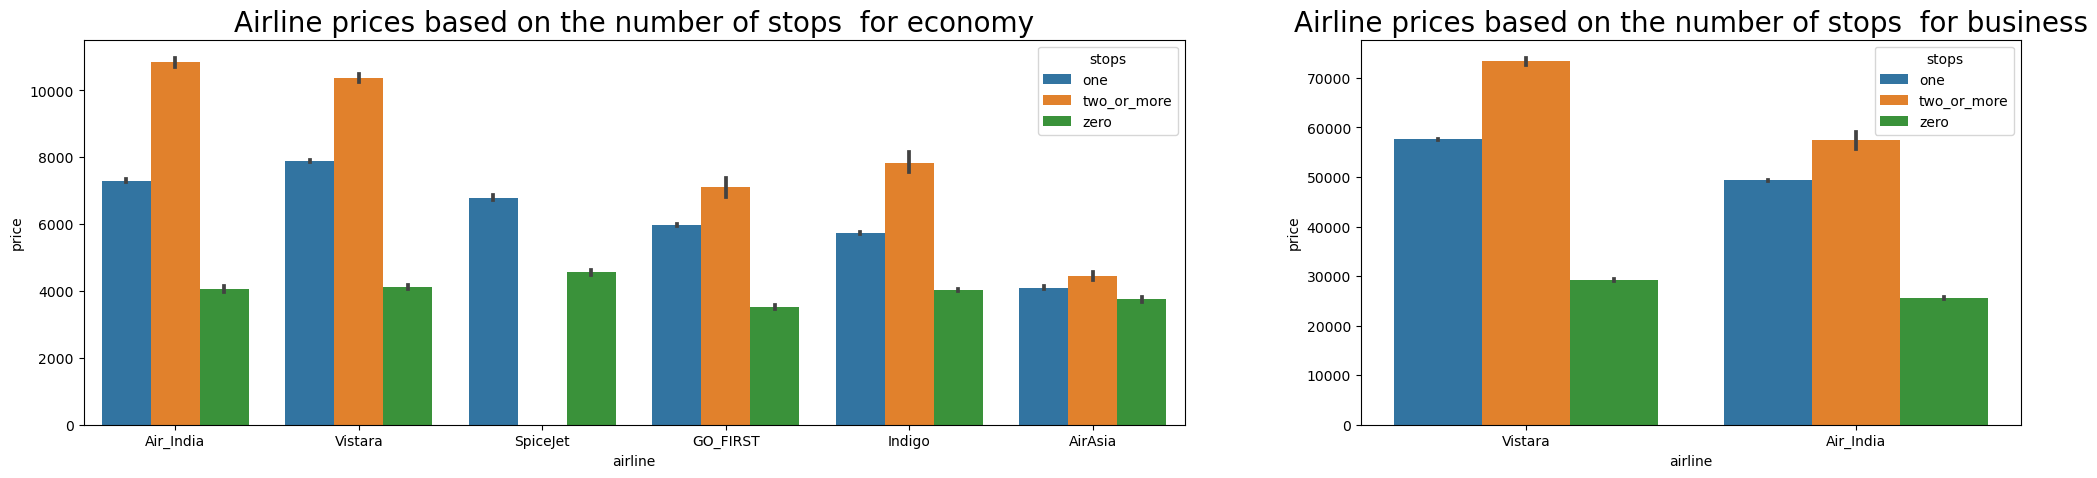

In [44]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "price", x = "airline",hue="stops",data = data.loc[data["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)
sns.barplot(y = "price", x = "airline",hue="stops",data = data.loc[data["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Airline prices based on the number of stops  for business",fontsize=20)

###### It's clear that the more stops there are the more expensive the flight is except for AirAsia where the prices seems more constant. The behaviour and different analysis of AirAsia tend to show that it relates to a low cost company.



What variable influence mostly?

In [55]:
def preprocessing(data):
    data["stops"] = data["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
    data["class"] = data["class"].replace({'Economy':0,'Business':1}).astype(int)
    dummies_variables = ["airline","source_city","destination_city","departure_time","arrival_time"]
    dummies = pd.get_dummies(data[dummies_variables], drop_first= True) 
    data = pd.concat([data,dummies],axis=1)    
    #Create the dummy variables for the cities, the times and the airlines.
    data = data.drop(["flight","airline","source_city","destination_city","departure_time","arrival_time"],axis=1)
    return data

In [56]:
data_preprocessed = preprocessing(data)

<Axes: >

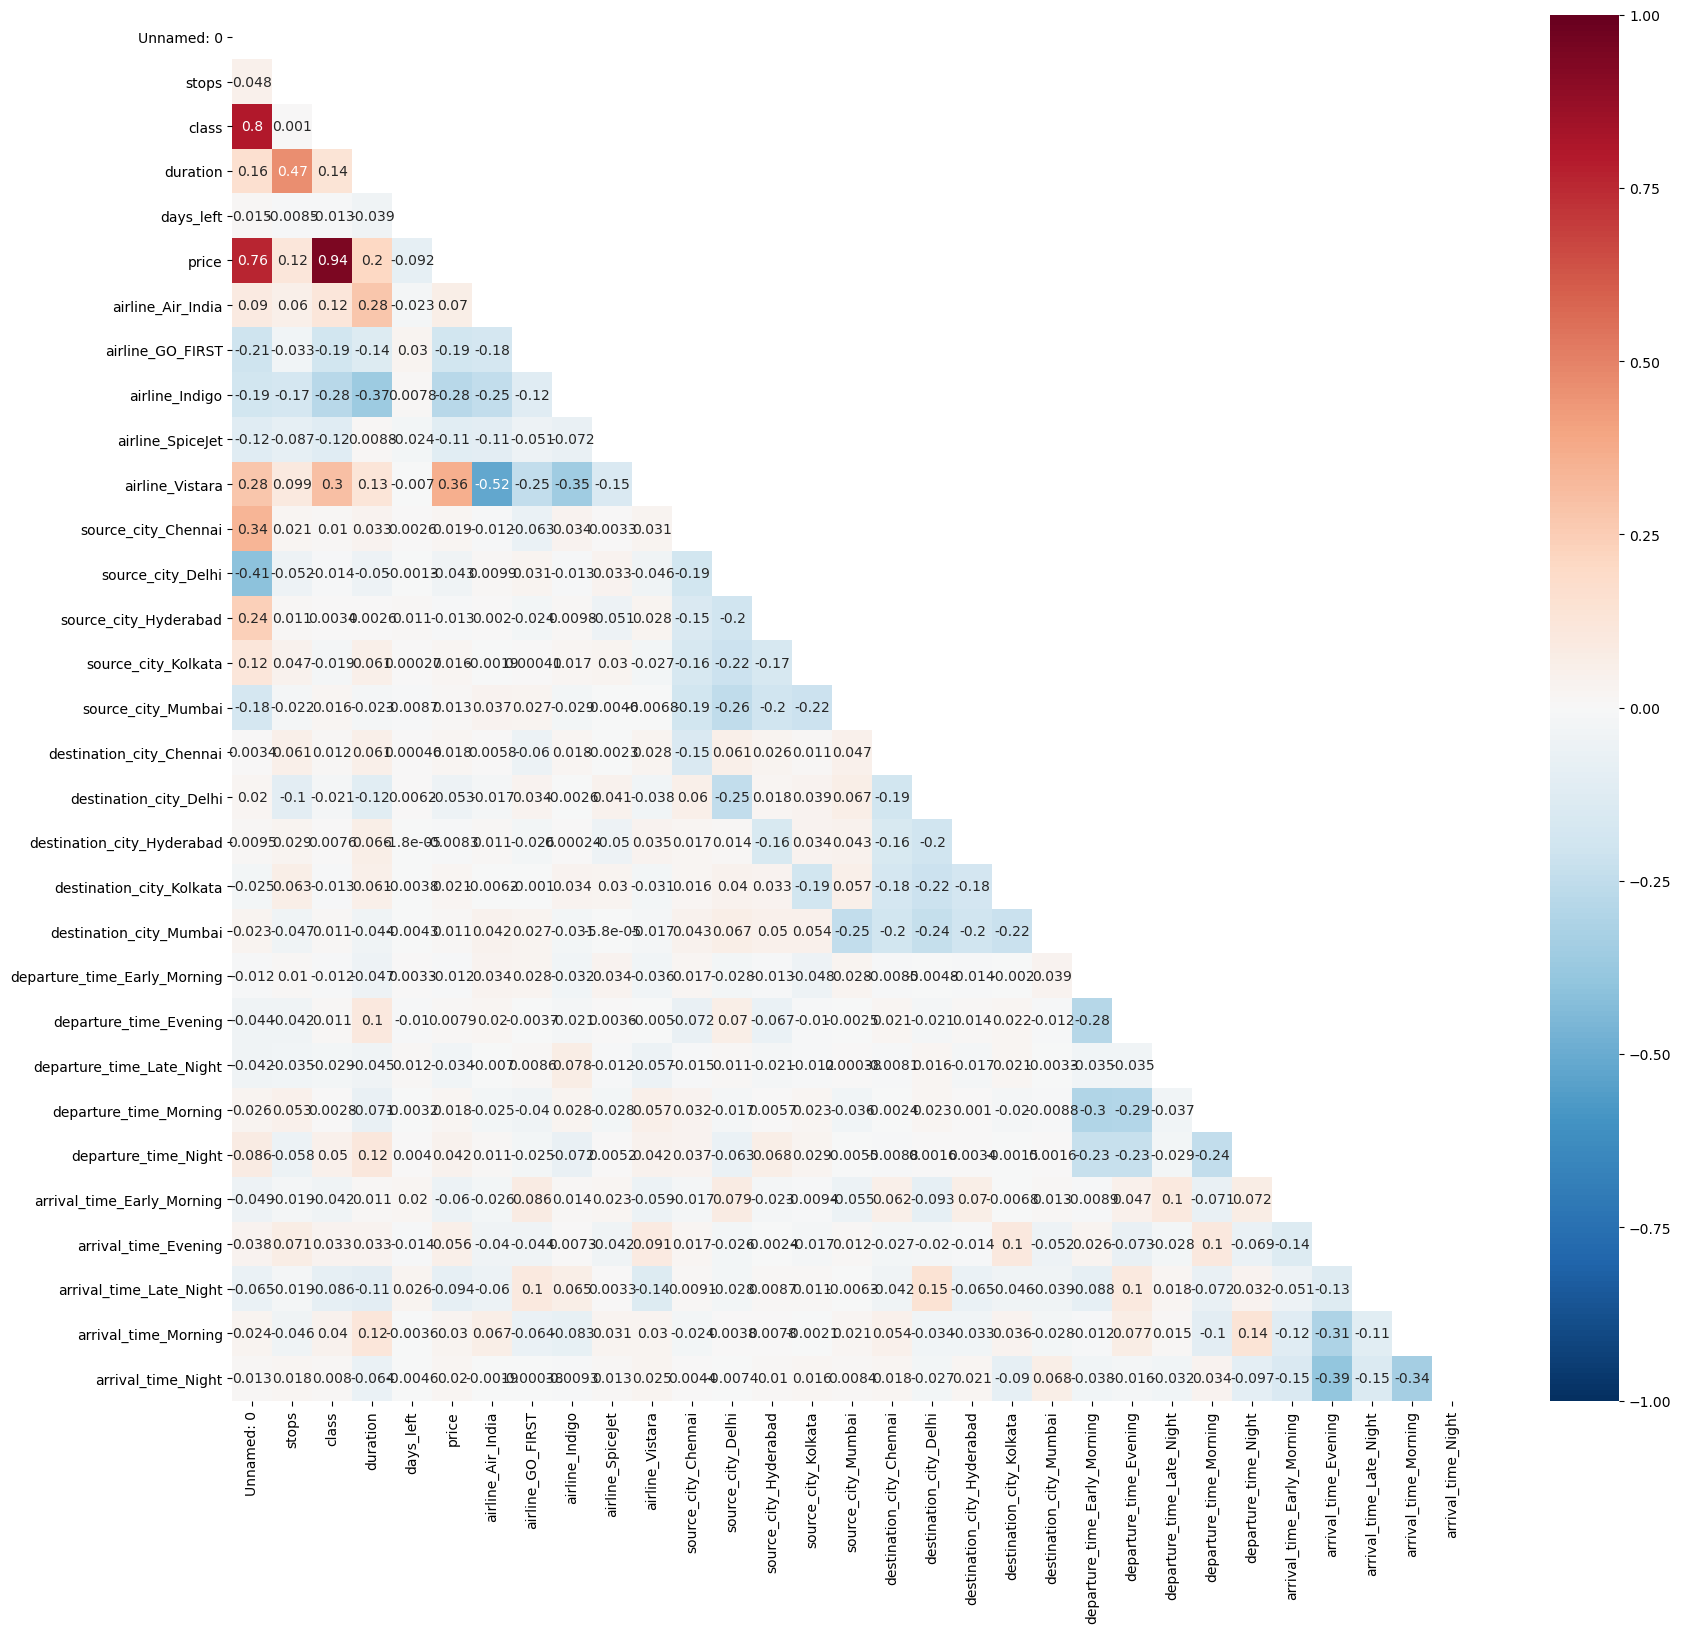

In [60]:
#To visualize the linear importance of each variables on the target, I will plot a correlation matrix.
mask = np.triu(np.ones_like(data_preprocessed.corr(), dtype=bool))

plt.figure(figsize = (20,18))
sns.heatmap(data_preprocessed.corr(), data = data_preprocessed, mask=mask,annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r')

In [66]:

#However, the correlation is a good metric for linear relationship, but doesn't highlight non linear ones. For that I will use mutual information.

from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [67]:
X = data_preprocessed.copy()
y = X.pop("price")

mi_scores = make_mi_scores(X, y)

KeyboardInterrupt: 

In [ ]:
print(mi_scores.sort_values(ascending=False))

In [ ]:
######### PREDICTIONS OF THE FLIGHT PRICE#########################

In [69]:
df=preprocessing(data)
X= df.copy()
y= df.pop("price")

from sklearn.model_selection import train_test_split,cross_val_score

xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state = 1,test_size=0.3, shuffle=True)

In [112]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

models={}

models["LinearRegression"] = {"model":LinearRegression()}
models["KNeighborsRegressor"]={"model":KNeighborsRegressor(n_neighbors=50)}
models["XGBRegressor"]={"model":XGBRegressor(n_jobs=5,learning_rate=0.1,max_depth=10,random_state=1)}
models["CatBoostRegressor"]={"model":CatBoostRegressor(logging_level ='Silent',iterations=500,random_state=1)}

In [113]:
def score_dataset(X, y, model=XGBRegressor()):
    for colname in X.select_dtypes(["category"]):
        X[colname] = X[colname].cat.codes
    
    score_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
    score_r2 = score_r2.mean()
    
    return score_r2

In [114]:
def get_scores(models,xtrain,ytrain):
    for name,model in models.items():
        model["model"].fit(xtrain,ytrain)

        score_r2 = score_dataset(xtrain, ytrain, model=model["model"])
        score = {'model':"Linear regression", 'score_r2':score_r2}
        print("--- "+name+" ---")
        print("Score r2: {}".format(score_r2))
        print("\n")


In [115]:
get_scores(models,xtrain,ytrain)



--- LinearRegression ---
Score r2: 1.0


--- KNeighborsRegressor ---
Score r2: 0.9998022433065685


--- XGBRegressor ---
Score r2: 0.9999991116525961


--- CatBoostRegressor ---
Score r2: 0.9996743587832299




It seems that best results are given by the XGBRegressor. This may be explain by the fact the some relationships ar enot linear like the duration or the days_left. Thus a more flexible algorithm like XGBRegressor tends to give better results.      

In [116]:
model = models["XGBRegressor"]["model"]
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

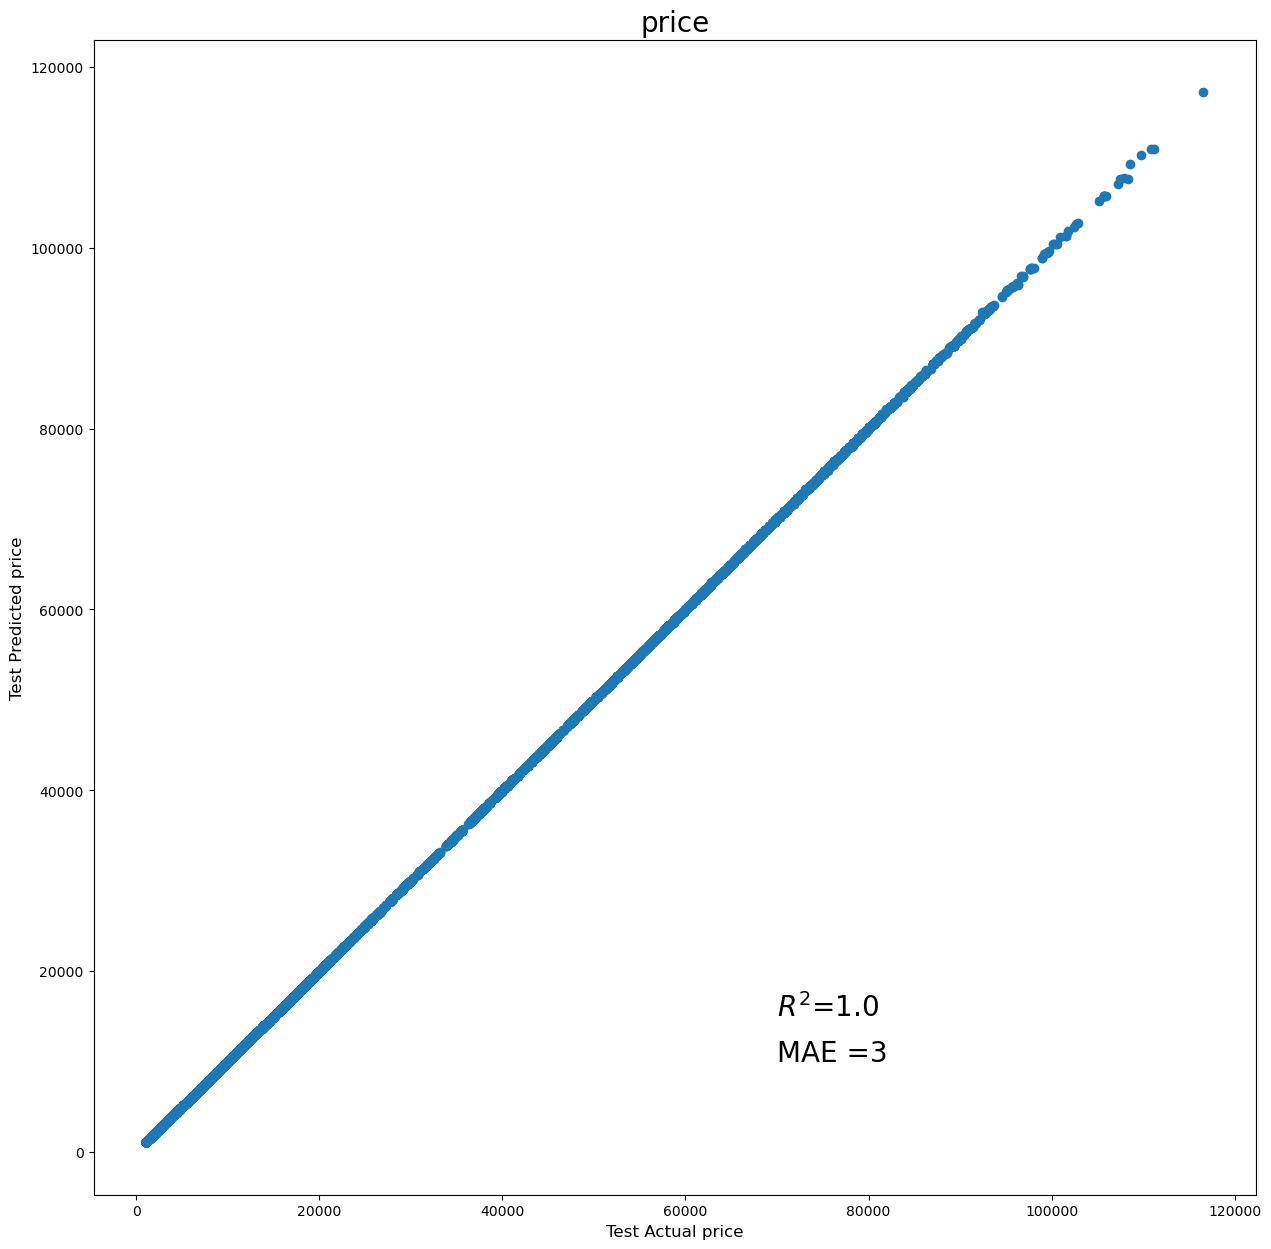

In [118]:
from sklearn.metrics import mean_absolute_error, r2_score
fig,ax = plt.subplots(figsize=(15,15))
ax.set_title("price",fontsize=20)
ax.set_ylabel('Test Predicted price',fontsize=12)
ax.set_xlabel('Test Actual price',fontsize=12)
ax.scatter(ytest,ypred)

score_r2 = r2_score(ytest, ypred) 
score_mae = mean_absolute_error(ytest, ypred)
plt.text(70000,15000,'$ R^{2} $=' + str(round(score_r2, 4)),fontsize=20)
plt.text(70000,10000,'MAE =' + str(round(score_mae)),fontsize=20)
plt.show()